In [47]:
import os
import shutil
import requests
from bs4 import BeautifulSoup
from xml.dom import minidom
from zipfile import ZipFile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

pd.set_option('display.max_rows', 100)

## Load Data

### Plasticizers

In [2]:
plasticizers = pd.read_excel('database/plasticizer_data_v4(rdkit_high_var).xls')
plasticizers = plasticizers[plasticizers.columns[1:]]

In [3]:
smiles = plasticizers['SMILES'].to_list()

### Toxins

In [4]:
with open('toxicity_data/toxins.xml', 'r') as f:
    entries = f.read().split('<compound>')

In [5]:
# remove metals and small peptides

ya = 0
nah = 0
tox_smiles = []
types = []
pass_vals = ['Metal', 'Halogen', 'Aluminum', 'Cyanide', 'Chromium', 'Tin', 'Zinc', 'Arsenic', 'Lead', 'Bromide', 'Antimony', 'Cobalt', 'Barium', 'Mercury', 'Copper', 'Vanadium', 'Cadmium', 'Silver', 'Manganese', 'Uranium', 'Nickel', 'Beryllium', 'Palladium', 'Selenium', 'Bromate', 'Radium']
pass_atoms = ['Hg', 'Pb', 'Cr', 'As', 'Ni', '+', 'Sb', 'Co', 'Sn']
for entry in entries[1:]:
    if 'smiles' in entry:
        ya += 1
    else:
        nah += 1
    try:
        type_list = entry.split('<types>')[1].split('</types')[0].split('<type>')[2].split('</type')[0]
        found = False
        for val in pass_vals:
            if val in type_list:
                found = True
            else:
                pass
        if found:
            pass
        else:
            smile = entry.split('<smiles>')[1].split('</smiles>')[0]
            found = False
            for atom in pass_atoms:
                if atom in smile:
                    found = True
            if found:
                pass
            elif len(smile) >= 10:
                tox_smiles.append(smile)
                tox_type = entry.split('<types>')[1].split('</types')[0].split('<type>')[2].split('</type')[0]
                types.append(tox_type)
            else:
                pass
    except IndexError:
        pass
toxins = pd.DataFrame(zip(tox_smiles, types), columns=['smiles', 'type'])

In [6]:
tox_samp = toxins.sample(250)
tox_smiles = tox_samp['smiles'].to_list()
tox_types = tox_samp['type'].to_list()

### GDB

In [8]:
gdb = pd.read_pickle('database/gdb17_5mil.pkl')

In [9]:
gdb_smiles = gdb.sample(250)['smile'].to_list()

### DrugBank

In [10]:
# Waiting on approval for data download

## Toxicity Web Scraper

In [11]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_2) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.149 Safari/537.36'
}

In [130]:
# Plasticizers

for i, smile in enumerate(smiles):
    print(i, smile)
    form_data = {
        'molecular': smile,
        'runType': 'all',
        'significant': '0.02'
    }
    url = "http://xundrug.cn/moltox"
    post_url = url + '/silicotox'
    post = requests.post(post_url, headers=headers, data=form_data)
    soup = BeautifulSoup(post.content, 'html5lib')
    download_url = url[:-7] + soup.find_all('a', string='download')[0]['href']
    r = requests.get(download_url)
    open('toxicity_data/{}.csv.gz'.format(i), 'wb').write(r.content)

0 CCCCC(CC)COC(=O)CCCCCCCCC(=O)OCC(CC)CCCC
200
200
1 CC(C)CCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCC(C)C
200
200
2 [Na+].[Na+].[O-][S](=O)(=O)c1ccc2c(Cc3cccc4cc(ccc34)[S]([O-])(=O)=O)cccc2c1
200
200
3 CCCCOC(=O)c1ccccc1C(=O)OCCCC
200
200
4 CC(C)COC(=O)CCCCC(=O)OCC(C)C
200
200
5 CCCCOCC(C)OCC(C)O
200
200
6 CC(C)c1ccc(O[P](=O)(Oc2ccc(cc2)C(C)C)Oc3ccc(cc3)C(C)C)cc1
200
200
7 O=C(OCCOCCOC(=O)c1ccccc1)c2ccccc2
200
200
8 CCCCCCC(=O)OCCOCCOCCOCCOC(=O)CCCCCC
200
200
9 CC(C)C(OC(=O)c1ccccc1)C(C)(C)COC(=O)C(C)C
200
200
10 CC(C)(C)c1ccc(O[P](=O)(Oc2ccccc2)Oc3ccccc3)cc1
200
200
11 CCCCCCCCCCCCCCCCCC(=O)OCCCC
200
200
12 CC(C)COC(=O)c1ccccc1C(=O)OCC(C)C
200
200
13 CCCCCCCCOC(=O)CCCCC(=O)OCCCCCCCC
200
200
14 COC(=O)CCCCC(=O)OC
200
200
15 CCOC(=O)CC(O)(CC(=O)OCC)C(=O)OCC
200
200
16 C\C=C\C
200
200
17 COC(=O)CCC(=O)OC
200
200
18 O=C(OCCCOCCCOC(=O)c1ccccc1)c2ccccc2
200
200
19 O=C(OC1CCCCC1)c2ccccc2C(=O)OC3CCCCC3
200
200
20 CCCCC(CC)COC(=O)CCCCC(=O)OCC(CC)CCCC
200
200
21 CCCCCCCCOC(=O)\C=C/C(=O)OCCCCCCCC
200
200


200
200
173 CCCCOCCOC(=O)c1ccccc1C(=O)OCCOCCCC
200
200
174 CCCCCCCCCCCCCCCCOC(=O)CCCCCCCCCCCCCCC
200
200
175 CCCCCCCCCCCCCCCC(=O)OCC(CC)CCCC
200
200
176 C=CCOC(=O)c1ccc(C(=O)OCC=C)c(c1)C(=O)OCC=C
200
200
177 CC(C)CCCCCCCOC(=O)CCCCCCCCC(=O)OCCCCCCCC(C)C
200
200
178 CCCCCCCCCCCCCCCCCCOC(=O)c1ccccc1C(=O)OCCCCCCCCCCCCCCCCCC
200
200
179 CCCCCCCC\C=C/CCCCCCCC(=O)OCC(COC(=O)CCCCCCC\C=C/CCCCCCCC)OC(=O)CCCCCCC\C=C/CCCCCCCC
200
200
180 CCCCOCCOCCOCCOC(=O)CCCC(=O)OCCOCCOCCOCCCC
200
200
181 CC(C)CCCCCCCOC(=O)CCCC(=O)OCCCCCCCC(C)C
200
200
182 CCCCOCCOC(=O)CCCCC(=O)OCCOCCCC
200
200
183 CCCCOCCOC(=O)CCCCCCCCC(=O)OCCOCCCC
200
200
184 CCCCCCCC\C=C/CCCCCCCC(=O)OCCOCCCC
200
200
185 CCCCCCCCCOC(=O)c1ccc(C(=O)OCCCCCCCCC)c(c1)C(=O)OCCCCCCCCC
200
200
186 CCCCC(CC)COC(=O)CCC(=O)OCC(CC)CCCC
200
200
187 CCCCCCCCCCCCN1CCCC1=O
200
200
188 O=C1CCCN1
200
200
189 COCCO
200
200
190 CCCCCCCC\C=C/CCCCCCCC(=O)OCC(CC)CCCC
200
200
191 CC(=O)CCC(O)=O
200
200
192 OCCOCCOC(=O)c1ccccc1
200
200
193 Cc1ccc(cc1)[S](N)(=O)=O
200


In [12]:
# Toxins

for i, smile in enumerate(tox_smiles):
    form_data = {
        'molecular': smile,
        'runType': 'all',
        'significant': '0.02'
    }
    url = "http://xundrug.cn/moltox"
    post_url = url + '/silicotox'
    post = requests.post(post_url, headers=headers, data=form_data)
    soup = BeautifulSoup(post.content, 'html5lib')
    download_url = url[:-7] + soup.find_all('a', string='download')[0]['href']
    r = requests.get(download_url)
    open('toxicity_data/toxins_emoltox/{}.csv.gz'.format(i), 'wb').write(r.content)

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [19]:
with open('toxicity_data/toxins_emoltox/tox_smiles.txt', 'w') as f:
    for smile in tox_smiles:
        f.write(smile+'\n')

'http://xundrug.cn/static/5537312SummaryTable.csv.gz'

In [32]:
# GDB

for i, smile in enumerate(gdb_smiles):
    form_data = {
        'molecular': smile,
        'runType': 'all',
        'significant': '0.02'
    }
    url = "http://xundrug.cn/moltox"
    post_url = url + '/silicotox'
    post = requests.post(post_url, headers=headers, data=form_data)
    soup = BeautifulSoup(post.content, 'html5lib')
    download_url = url[:-7] + soup.find_all('a', string='download')[0]['href']
    r = requests.get(download_url)
    open('toxicity_data/gdb_emoltox/{}.csv.gz'.format(i), 'wb').write(r.content)

In [33]:
with open('toxicity_data/gdb_emoltox/gdb_smiles.txt', 'w') as f:
    for smile in gdb_smiles:
        line = smile+'\n'
        f.write(line)

## Data Analysis

In [85]:
def calc_toxicity_score(fn):
    data = pd.read_csv(fn)
    data = data.drop_duplicates()
    data = data[data.columns[1:-1]]
    data = data[data.Outcome != 'Inconclusive']
    
    toxicity = 0
    pos_count = 0
    neg_count = 0
    for j, row in data.iterrows():
        if row.Outcome == 'Negative':
            toxicity -= row.Confidence
            neg_count += 1*row.Confidence
        elif row.Outcome == 'Positive':
            toxicity += row.Confidence
            pos_count += 1*row.Confidence
    toxicity = pos_count
    return toxicity, pos_count, neg_count

In [86]:
toxins = []
toxins_pos = []
toxins_neg = []
gdb = []
gdb_pos = []
gdb_neg = []
plasticizers = []
plasticizers_pos = []
plasticizers_neg = []

tox_dir = 'toxicity_data/toxins_emoltox'
gdb_dir = 'toxicity_data/gdb_emoltox'
plasticizers_dir = 'toxicity_data/plasticizers_emoltox'

for fn in os.listdir(tox_dir):
    ext = fn.split('.')[1]
    if ext == 'csv':
        fn = os.path.join(tox_dir, fn)
        toxicity, pos_count, neg_count = calc_toxicity_score(fn)
        toxins.append(toxicity)
        toxins_pos.append(pos_count)
        toxins_neg.append(neg_count)

for fn in os.listdir(gdb_dir):
    ext = fn.split('.')[1]
    if ext == 'csv':
        fn = os.path.join(gdb_dir, fn)
        toxicity, pos_count, neg_count = calc_toxicity_score(fn)
        gdb.append(toxicity)
        gdb_pos.append(pos_count)
        gdb_neg.append(neg_count)

for fn in os.listdir(plasticizers_dir):
    ext = fn.split('.')[1]
    if ext == 'csv':
        fn = os.path.join(plasticizers_dir, fn)
        toxicity, pos_count, neg_count = calc_toxicity_score(fn)
        plasticizers.append(toxicity)
        plasticizers_pos.append(pos_count)
        plasticizers_neg.append(neg_count)

In [87]:
# scaler = MinMaxScaler()
# scaler.fit(np.array(toxins+gdb+plasticizers).reshape(-1,1))
# toxins = scaler.transform(np.array(toxins).reshape(-1,1))
# gdb = scaler.transform(np.array(gdb).reshape(-1,1))
# plasticizers = scaler.transform(np.array(plasticizers).reshape(-1,1))

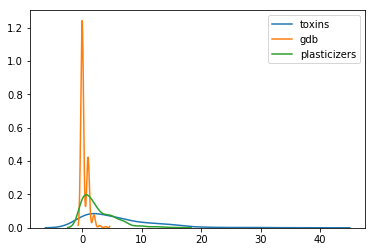

In [88]:
sns.distplot(toxins, kde=True, hist=False, label='toxins')
sns.distplot(gdb, kde=True, hist=False, label='gdb')
sns.distplot(plasticizers, kde=True, hist=False, label='plasticizers')
plt.legend(loc='best')
plt.show()

In [89]:
np.mean(toxins), np.mean(gdb), np.mean(plasticizers)

(6.140516129032258, 0.364032, 2.756357843137255)